# Course project - Big Data Concepts
## Yash Pratap Solanky

## Introduction 
### Cryptocurrencies have recently become a widely recognised way for many individuals to invest their money. Cryptocurrency values have increased dramatically during the last several years. As a result, I tried numerous ways to find an efficient and accurate model to predict the price using machine learning algorithms. For the course project, I analysed four cryptocurrencies and attempted to predict the price of bitcoin. The CSV time series data is uploaded to GitHub. The time-series data in CSV format is posted to GitHub. The GitHub repository is then cloned into a Jupyter notebook under the Google cloud platform's AI platform. The time-series graph and the prediction graph are then saved as png files and uploaded to Github and to a bucket on the Google cloud platform that has been created separately.

## Background 
### I attempted to predict cryptocurrencies due to the fluctuating nature and fluctuation in the values of cryptocurrencies since the pandemic has piqued the interest of people all around the world. We can completely compute, store, analyse, and predict this project on the Google cloud platform thanks to the usage of virtual machines. Although this project could have been completed on a local system, the usage of a virtual machine makes it extremely simple for anybody to replicate it for any time series data. It might be for stocks, cryptocurrency, or something else.

## Methodology 
### Step 1 - Downloading the time series data of various cryptocurrencies from https://www.cryptodatadownload.com/. 
### Step 2 - Creating a repositorty and uploading the downloaded data on the repository
### Step 3 - Creating a Jupyer notebook on AI platform on Google cloud platform. Then cloning the repository to this Jupyter enviroment
### Step 4 - Performing exploratory data analysis on the data, performing data engineering( cleaning data, transforming data) and then using the final dataset to make prediction using ARIMA algorithm
### Step 5 - Creating a google cloud platform bucket
### Step 6 - Saving the graphs from the project to the bucket. 
### Step 7 - Making the graphs public from the bucket

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from datetime import datetime,date

In [3]:
# Import the data files. We are going to be analysing and predicting 3 separate cryptocurrencies. 
btc = pd.read_csv("Gemini_BTCUSD_d.csv",skiprows=1) #Bitcoin
eth = pd.read_csv("Gemini_ETHUSD_d.csv",skiprows=1) #Ehtereum
ltc = pd.read_csv("Gemini_LTCUSD_d.csv",skiprows=1) #Litecoin
dog = pd.read_csv("Gemini_DOGEUSD_d.csv",skiprows=1) #Dogecoin

In [4]:
btc.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1651032000000,2022-04-27 04:00:00,BTC/USD,38344.79,39463.17,38316.92,39179.01,646.587599,2.533266e+07
1,1650945600000,2022-04-26 04:00:00,BTC/USD,40541.18,40783.69,37697.42,38344.79,1297.579024,4.975540e+07
2,1650859200000,2022-04-25 04:00:00,BTC/USD,39260.92,40765.94,38221.87,40541.18,1370.403628,5.555778e+07
3,1650772800000,2022-04-24 04:00:00,BTC/USD,39780.94,39933.07,38695.95,39260.92,515.669742,2.024567e+07
4,1650686400000,2022-04-23 04:00:00,BTC/USD,39482.00,39988.99,39299.82,39780.94,402.215227,1.600050e+07


In [5]:
for i in [btc, eth, ltc, dog]:
    i.drop(columns = ["unix","symbol"],inplace = True)

In [6]:
btc.head()

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-04-27 04:00:00,38344.79,39463.17,38316.92,39179.01,646.587599,2.533266e+07
1,2022-04-26 04:00:00,40541.18,40783.69,37697.42,38344.79,1297.579024,4.975540e+07
2,2022-04-25 04:00:00,39260.92,40765.94,38221.87,40541.18,1370.403628,5.555778e+07
3,2022-04-24 04:00:00,39780.94,39933.07,38695.95,39260.92,515.669742,2.024567e+07
4,2022-04-23 04:00:00,39482.00,39988.99,39299.82,39780.94,402.215227,1.600050e+07


In [7]:
btc.describe()

,open,high,low,close,Volume BTC,Volume USD
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2.394000e+03
mean,13901.230188,14317.782135,13458.189294,13917.536462,3209.448654,3.477780e+07
std,17101.913662,17597.578163,16552.239402,17107.359712,3885.995506,4.990896e+07
min,0.000000,245.000000,0.000000,243.600000,0.000000,0.000000e+00
25%,2187.042500,2324.060000,2065.305000,2210.945000,1042.351601,3.813598e+06
50%,7434.715000,7653.760000,7256.310000,7434.715000,1918.755188,1.705102e+07
75%,12302.035000,13027.722500,11695.102500,12450.150000,3673.998996,4.552247e+07
max,68525.750000,69000.000000,66262.480000,68525.750000,54142.433523,6.914380e+08


In [8]:
btc["date"]

0       2022-04-27 04:00:00
1       2022-04-26 04:00:00
2       2022-04-25 04:00:00
3       2022-04-24 04:00:00
4       2022-04-23 04:00:00
               ...         
2389    2015-10-12 04:00:00
2390    2015-10-11 04:00:00
2391    2015-10-10 04:00:00
2392    2015-10-09 04:00:00
2393    2015-10-08 04:00:00
Name: date, Length: 2394, dtype: object

In [9]:
for i in [btc, eth, ltc,dog]:
    i['date'] = pd.to_datetime(i['date'])

In [10]:
btc["date"]

0      2022-04-27 04:00:00
1      2022-04-26 04:00:00
2      2022-04-25 04:00:00
3      2022-04-24 04:00:00
4      2022-04-23 04:00:00
               ...        
2389   2015-10-12 04:00:00
2390   2015-10-11 04:00:00
2391   2015-10-10 04:00:00
2392   2015-10-09 04:00:00
2393   2015-10-08 04:00:00
Name: date, Length: 2394, dtype: datetime64[ns]

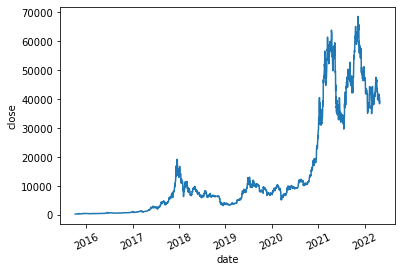

In [11]:
sns.lineplot(x="date",y="close",data = btc)
plt.xticks(rotation=25)
plt.savefig('btc.png')
#We are plotting CLOSE price. Which is the price of the cryptocurency at the end of the day

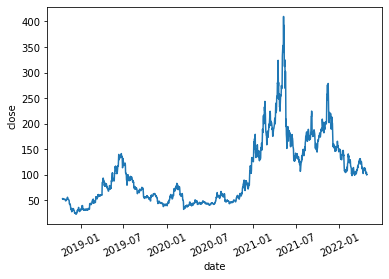

In [12]:
sns.lineplot(x="date",y="close",data = ltc)
plt.xticks(rotation=25)
plt.savefig('ltc.png')
#We are plotting CLOSE price. Which is the price of the cryptocurency at the end of the day

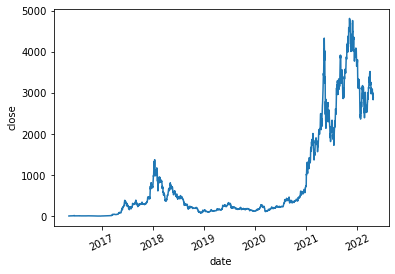

In [13]:
sns.lineplot(x="date",y="close",data = eth)
plt.xticks(rotation=25)
plt.savefig('eth.png')
#We are plotting CLOSE price. Which is the price of the cryptocurency at the end of the day

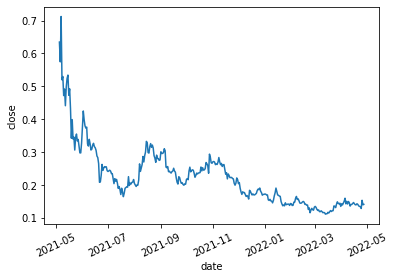

In [14]:
sns.lineplot(x="date",y="close",data = dog)
plt.xticks(rotation=25)
plt.savefig('dog.png')
#We are plotting CLOSE price. Which is the price of the cryptocurency at the end of the day

In [15]:
var = ['open', 'high', 'low', 'close']
t = ['date']

(array([16436., 16801., 17167., 17532., 17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

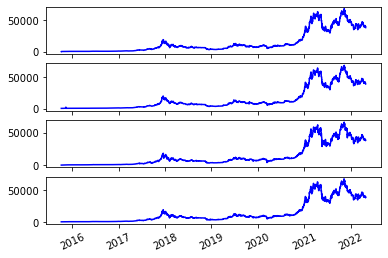

In [16]:
fig,ax = plt.subplots(4, sharex=True)

for i in range(4):    
    ax[i].plot(btc[t],btc[var[i]],color='blue')
plt.xticks(rotation=25)

(array([17897., 18078., 18262., 18444., 18628., 18809., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

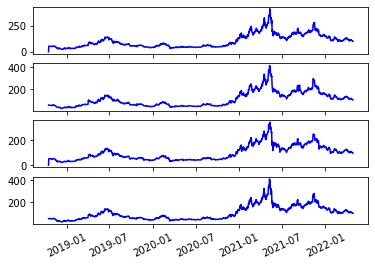

In [17]:
fig,ax = plt.subplots(4, sharex=True)

for i in range(4):    
    ax[i].plot(ltc[t],ltc[var[i]],color='blue')
plt.xticks(rotation=25)

(array([16801., 17167., 17532., 17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

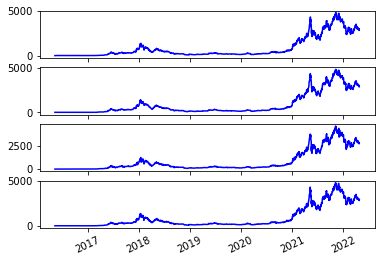

In [18]:
fig,ax = plt.subplots(4, sharex=True)

for i in range(4):    
    ax[i].plot(eth[t],eth[var[i]],color='blue')
plt.xticks(rotation=25)

(array([18748., 18809., 18871., 18932., 18993., 19052., 19113.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

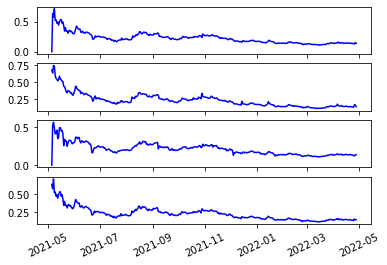

In [19]:
fig,ax = plt.subplots(4, sharex=True)

for i in range(4):    
    ax[i].plot(dog[t],dog[var[i]],color='blue')
plt.xticks(rotation=25)

### Predicting BTC prices using ARIma algorithm

In [20]:
from statsmodels.tsa.arima.model import ARIMA 

In [21]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg as AR

In [22]:
btc2 = btc.copy()
btc2

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-04-27 04:00:00,38344.79,39463.17,38316.92,39179.01,646.587599,2.533266e+07
1,2022-04-26 04:00:00,40541.18,40783.69,37697.42,38344.79,1297.579024,4.975540e+07
2,2022-04-25 04:00:00,39260.92,40765.94,38221.87,40541.18,1370.403628,5.555778e+07
3,2022-04-24 04:00:00,39780.94,39933.07,38695.95,39260.92,515.669742,2.024567e+07
4,2022-04-23 04:00:00,39482.00,39988.99,39299.82,39780.94,402.215227,1.600050e+07
...,...,...,...,...,...,...,...
2389,2015-10-12 04:00:00,248.98,248.98,245.75,245.75,71.047743,1.745998e+04
2390,2015-10-11 04:00:00,246.30,249.50,245.96,248.98,22.747091,5.663571e+03
2391,2015-10-10 04:00:00,245.51,246.30,244.60,246.30,30.870549,7.603416e+03
2392,2015-10-09 04:00:00,243.60,249.97,243.60,245.51,61.587068,1.512024e+04


In [23]:
btc2.drop(columns = ["open","high","low","Volume BTC","Volume USD"],inplace = True)
btc2 = btc2[::-1]
btc2.set_index(['date'],inplace=True)
btc2

,close
date,
2015-10-08 04:00:00,243.60
2015-10-09 04:00:00,245.51
2015-10-10 04:00:00,246.30
2015-10-11 04:00:00,248.98
2015-10-12 04:00:00,245.75
...,...
2022-04-23 04:00:00,39780.94
2022-04-24 04:00:00,39260.92
2022-04-25 04:00:00,40541.18


In [24]:
X = btc2.values
train,test = X[0:len(X)-30],X[len(X)-30:]

In [48]:
model = ARIMA(train,order=(10,1,5))
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use.

In [49]:
model_fit = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [50]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [51]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=47534.260873, expected=47468.070000
predicted=47369.346766, expected=47108.130000
predicted=47378.613848, expected=44600.000000
predicted=47342.669760, expected=46618.390000
predicted=47429.270364, expected=45964.350000
predicted=47601.738815, expected=46019.340000
predicted=47658.235727, expected=46666.700000
predicted=47905.634259, expected=45193.400000
predicted=47750.177712, expected=43304.160000
predicted=47865.372828, expected=43627.540000
predicted=47594.483586, expected=42400.010000
predicted=47698.062343, expected=42810.850000
predicted=47590.730535, expected=42096.930000
predicted=47769.758675, expected=39750.000000
predicted=47829.334475, expected=40086.760000
predicted=47901.691256, expected=41339.600000
predicted=47938.878869, expected=40199.810000
predicted=47799.254174, expected=40437.470000
predicted=47821.069702, expected=40253.710000
predicted=47646.983249, expected=39837.450000
predicted=47789.331732, expected=40709.480000
predicted=47725.438841, expected=4

In [52]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2364
Model:                ARIMA(10, 1, 5)   Log Likelihood              -19288.510
Date:                Fri, 29 Apr 2022   AIC                          38609.019
Time:                        16:58:13   BIC                          38701.302
Sample:                             0   HQIC                         38642.619
                               - 2364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.250      1.356      0.175      -0.151       0.828
ar.L2          0.9971      0.114      8.712      0.000       0.773       1.221
ar.L3         -0.9257      0.148     -6.262      0.0

Test RMSE: 6184.682


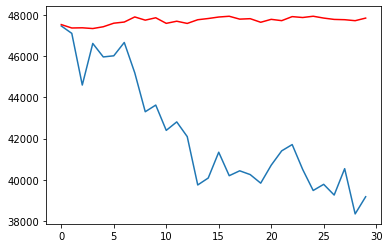

In [53]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.savefig('btcarima.png')
pyplot.show()

### Using prophet library to predict BTC prices

In [154]:
from prophet import Prophet

In [155]:
btc_fb = btc.copy()
btc_fb

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-04-27 04:00:00,38344.79,39463.17,38316.92,39179.01,646.587599,2.533266e+07
1,2022-04-26 04:00:00,40541.18,40783.69,37697.42,38344.79,1297.579024,4.975540e+07
2,2022-04-25 04:00:00,39260.92,40765.94,38221.87,40541.18,1370.403628,5.555778e+07
3,2022-04-24 04:00:00,39780.94,39933.07,38695.95,39260.92,515.669742,2.024567e+07
4,2022-04-23 04:00:00,39482.00,39988.99,39299.82,39780.94,402.215227,1.600050e+07
...,...,...,...,...,...,...,...
2389,2015-10-12 04:00:00,248.98,248.98,245.75,245.75,71.047743,1.745998e+04
2390,2015-10-11 04:00:00,246.30,249.50,245.96,248.98,22.747091,5.663571e+03
2391,2015-10-10 04:00:00,245.51,246.30,244.60,246.30,30.870549,7.603416e+03
2392,2015-10-09 04:00:00,243.60,249.97,243.60,245.51,61.587068,1.512024e+04


In [156]:
btc_fb.drop(columns = ["open","high","low","Volume BTC","Volume USD"],inplace = True)

btc_fb = btc_fb[::-1]
btc_fb.reset_index(drop=True, inplace = True)
btc_fb_test = btc_fb[0:2300].copy()
btc_fb_test

,date,close
0,2015-10-08 04:00:00,243.60
1,2015-10-09 04:00:00,245.51
2,2015-10-10 04:00:00,246.30
3,2015-10-11 04:00:00,248.98
4,2015-10-12 04:00:00,245.75
...,...,...
2295,2022-01-19 04:00:00,41954.50
2296,2022-01-20 04:00:00,38462.49
2297,2022-01-21 04:00:00,36341.40
2298,2022-01-22 04:00:00,35080.27


In [157]:
btc_fb_test.rename(columns={"close":"y", "date":"ds"},inplace = True)

In [158]:
m = Prophet()
m.fit(btc_fb_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -37.156


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4599.51     0.0357027       272.858           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4626.92    0.00108216       176.693           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4633.18   0.000739796       67.8849           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       4633.73   0.000370033       185.714   3.995e-06       0.001      444  LS failed, Hessian reset 
     397       4635.74   0.000200854       133.313   1.387e-06       0.001      574  LS failed, Hessian reset 
     399       4636.16     0.0102446       229.114           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha

In [159]:
future = m.make_future_dataframe(periods=94) # Periods defines the number of days into the future that we are trying to predict.

In [160]:
future.head()

,ds
0,2015-10-08 04:00:00
1,2015-10-09 04:00:00
2,2015-10-10 04:00:00
3,2015-10-11 04:00:00
4,2015-10-12 04:00:00


In [161]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-10-08 04:00:00,-1947.057613,-8194.353794,4706.685631
1,2015-10-09 04:00:00,-1741.065936,-8410.025552,4621.467844
2,2015-10-10 04:00:00,-1627.480894,-8178.602661,5064.992585
3,2015-10-11 04:00:00,-1462.370353,-7654.305414,5270.492759
4,2015-10-12 04:00:00,-1276.305951,-7874.416363,5341.733098


In [162]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-10-08 04:00:00,-311.354658,-8194.353794,4706.685631,-311.354658,-311.354658,-1635.702955,-1635.702955,-1635.702955,-29.852522,-29.852522,-29.852522,-1605.850433,-1605.850433,-1605.850433,0.0,0.0,0.0,-1947.057613
1,2015-10-09 04:00:00,-308.509034,-8410.025552,4621.467844,-308.509034,-308.509034,-1432.556902,-1432.556902,-1432.556902,20.718966,20.718966,20.718966,-1453.275868,-1453.275868,-1453.275868,0.0,0.0,0.0,-1741.065936
2,2015-10-10 04:00:00,-305.663409,-8178.602661,5064.992585,-305.663409,-305.663409,-1321.817485,-1321.817485,-1321.817485,-21.686067,-21.686067,-21.686067,-1300.131418,-1300.131418,-1300.131418,0.0,0.0,0.0,-1627.480894
3,2015-10-11 04:00:00,-302.817785,-7654.305414,5270.492759,-302.817785,-302.817785,-1159.552569,-1159.552569,-1159.552569,-11.387005,-11.387005,-11.387005,-1148.165563,-1148.165563,-1148.165563,0.0,0.0,0.0,-1462.370353
4,2015-10-12 04:00:00,-299.972160,-7874.416363,5341.733098,-299.972160,-299.972160,-976.333790,-976.333790,-976.333790,22.710759,22.710759,22.710759,-999.044550,-999.044550,-999.044550,0.0,0.0,0.0,-1276.305951


In [163]:
forecast_test = forecast[["yhat"]]
forecast_test = forecast_test[2299:]
test = btc_fb["close"].copy()
test = test[2299:]

In [164]:
forecast_test =  np.array(forecast_test)
test = np.array(test)

In [165]:
for i in range(len(forecast_test)):
    print('predicted=%f, expected=%f' % (forecast_test[i], test[i]))

predicted=59988.969833, expected=35369.000000
predicted=60224.732712, expected=36463.330000
predicted=60427.894619, expected=37428.060000
predicted=60667.940397, expected=35795.030000
predicted=60875.820890, expected=37371.180000
predicted=61190.250157, expected=37765.270000
predicted=61423.956417, expected=37953.810000
predicted=61720.866948, expected=37046.280000
predicted=62050.157125, expected=38640.920000
predicted=62336.349543, expected=38591.080000
predicted=62647.594220, expected=36839.210000
predicted=62913.720893, expected=37330.900000
predicted=63272.555785, expected=41487.510000
predicted=63536.187130, expected=41485.000000
predicted=63848.159455, expected=42863.790000
predicted=64177.526687, expected=44229.630000
predicted=64448.950015, expected=43380.730000
predicted=64730.971633, expected=43819.660000
predicted=64954.055597, expected=43372.170000
predicted=65256.888488, expected=42329.090000
predicted=65452.624617, expected=42254.290000
predicted=65686.056249, expected=4

Test RMSE: 26681.249


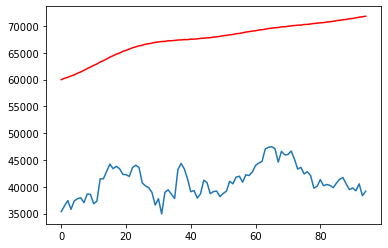

In [167]:
rmse = sqrt(mean_squared_error(forecast_test, test))
print('Test RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(forecast_test, color='red')
plt.savefig('prophet_prediction.png')
pyplot.show()

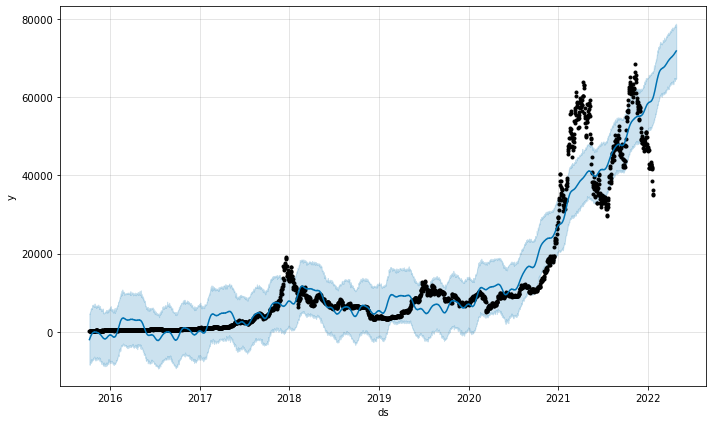

In [168]:
fig1 = m.plot(forecast)

In [169]:
btc_fb1 = btc.copy()
btc_fb1.drop(columns = ["open","high","low","Volume BTC","Volume USD"],inplace = True)
btc_fb1 = btc_fb[::-1]
btc_fb1.reset_index(drop=True, inplace = True)
btc_fb_test1 = btc_fb1.copy()
btc_fb_test1.rename(columns={"close":"y", "date":"ds"},inplace = True)

In [170]:
m1 = Prophet(daily_seasonality=True)
m1.fit(btc_fb_test1)

Initial log joint probability = -39.7058


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4478.67    0.00300982       420.703     0.04284           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4562.05      0.508165       1340.81           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4606.73     0.0146339       209.312           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     373       4627.95   0.000654684       686.208   1.519e-06       0.001      500  LS failed, Hessian reset 
     399       4634.51    0.00924107       301.202           1           1      529   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        4645.1   0.000461384       95.6881      0.9604    0.009604      6

In [171]:
future = m1.make_future_dataframe(periods=365)
forecast = m1.predict(future)

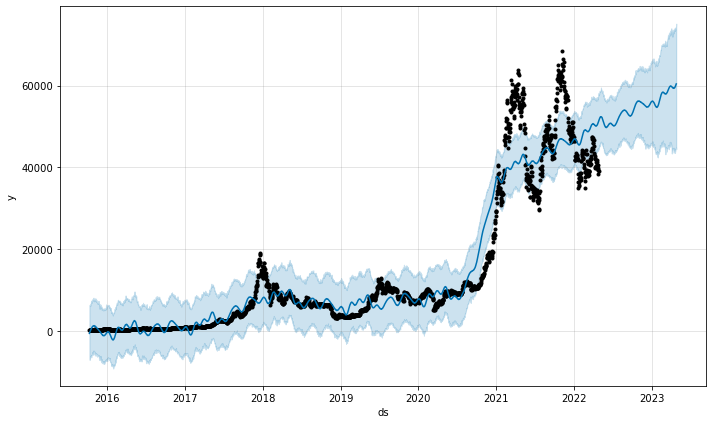

In [172]:
fig2 = m1.plot(forecast)
plt.savefig('prophet.png')

### Saving output to bucket

In [108]:
from google.cloud import storage

In [109]:
client = storage.Client()

In [110]:
bucket = client.get_bucket('crypto-project')

In [111]:
blob = bucket.blob('btc.png')
blob.upload_from_filename('btc.png')

In [112]:
blob = bucket.blob('btcarima.png')
blob.upload_from_filename('btcarima.png')

In [113]:
blob = bucket.blob('prophet.png')
blob.upload_from_filename('prophet.png')

In [114]:
blob = bucket.blob('prophet_prediction.png')
blob.upload_from_filename('prophet_prediction.png')

## Results
### Using arima, we were not able to accurately predict the price of Bitcoin. The algorithm predicted the price of bitcoin to remain stable but the price dropped dramatically. This is to be somewhat expected as Bitcoin and all cryptocrrencies follow an erratic pattern. 

## Discussion 
### 

## Conclusion 
### 

## References
### 1. https://www.qwiklabs.com/focuses/1846?catalog_rank=%7B%22rank%22%3A1%2C%22num_filters%22%3A0%2C%22has_search%22%3Atrue%7D&parent=catalog&search_id=7008005
### 2. https://cloud.google.com/ai-platform/training/docs/working-with-cloud-storage
### 3. https://www.cryptodatadownload.com/
### 4. https://github.com/googleapis/python-storage
### 5. https://stackoverflow.com/questions/37003862/how-to-upload-a-file-to-google-cloud-storage-on-python-3